In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rodsaldanha/arketing-campaign")

print("Path to dataset files:", path)

c:\Users\admin\anaconda3\envs\test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 352k/352k [00:00<00:00, 979kB/s]

Extracting files...
Path to dataset files: C:\Users\admin\.cache\kagglehub\datasets\rodsaldanha\arketing-campaign\versions\8


In [2]:
import pandas as pd
import os

# path에 저장된 첫 번째 csv 파일을 데이터프레임으로 읽기
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
df = pd.read_csv(os.path.join(path, csv_files[0]))
df.head()

,ID;Year_Birth;Education;Marital_Status;Income;Kidhome;Teenhome;Dt_Customer;Recency;MntWines;MntFruits;MntMeatProducts;MntFishProducts;MntSweetProducts;MntGoldProds;NumDealsPurchases;NumWebPurchases;NumCatalogPurchases;NumStorePurchases;NumWebVisitsMonth;AcceptedCmp3;AcceptedCmp4;AcceptedCmp5;AcceptedCmp1;AcceptedCmp2;Complain;Z_CostContact;Z_Revenue;Response
0,5524;1957;Graduation;Single;58138;0;0;2012-09-...
1,2174;1954;Graduation;Single;46344;1;1;2014-03-...
2,4141;1965;Graduation;Together;71613;0;0;2013-0...
3,6182;1984;Graduation;Together;26646;1;0;2014-0...
4,5324;1981;PhD;Married;58293;1;0;2014-01-19;94;...


In [3]:
# 세미콜론 구분자로 csv 파일을 다시 읽어오기
df = pd.read_csv(os.path.join(path, csv_files[0]), sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# 데이터프레임 기본 정보 확인
print(df.info())
print("\n결측치 개수:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# object 타입 열의 카테고리(고유값) 수 확인
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    print(f"{col}: {df[col].nunique()}개")

Education: 5개
Marital_Status: 8개
Dt_Customer: 663개


In [8]:
# Dt_Customer 열을 datetime 타입으로 변환 후, 가장 최근 날짜 확인
recent_date = pd.to_datetime(df['Dt_Customer']).max()
print("가장 최근 Dt_Customer 날짜:", recent_date)

가장 최근 Dt_Customer 날짜: 2014-06-29 00:00:00


In [9]:
print(df['Marital_Status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [10]:
print(df['Education'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [11]:
# 2014년 기준으로 나이 계산 후 'age' 열로 추가하고, 'Year_Birth' 열 삭제
df['age'] = 2014 - df['Year_Birth']
df = df.drop(columns=['Year_Birth'])
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,57
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,60
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,49
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,30
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,33


In [12]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'together' if x.lower() in ['together', 'married'] else 'single')
df['Marital_Status'].value_counts()

Marital_Status
together    1444
single       796
Name: count, dtype: int64

In [13]:
df['hasChile'] = ((df['Kidhome'] + df['Teenhome']) > 0).astype(int)
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,hasChile
0,5524,Graduation,single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,3,11,1,57,0
1,2174,Graduation,single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,3,11,0,60,1
2,4141,Graduation,together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,3,11,0,49,0
3,6182,Graduation,together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,3,11,0,30,1
4,5324,PhD,together,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,3,11,0,33,1


In [14]:
education_map = {
    'Basic': 9,
    '2n Cycle': 12,
    'Graduation': 16,
    'Master': 18,
    'PhD': 22
}
df['Education_num'] = df['Education'].str.strip().replace(education_map)
df[['Education', 'Education_num']].head()

C:\Users\admin\AppData\Local\Temp\ipykernel_9908\2735122182.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education_num'] = df['Education'].str.strip().replace(education_map)


,Education,Education_num
0,Graduation,16
1,Graduation,16
2,Graduation,16
3,Graduation,16
4,PhD,22


In [15]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,hasChile,Education_num
0,5524,Graduation,single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,3,11,1,57,0,16
1,2174,Graduation,single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,3,11,0,60,1,16
2,4141,Graduation,together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,3,11,0,49,0,16
3,6182,Graduation,together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,3,11,0,30,1,16
4,5324,PhD,together,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,3,11,0,33,1,22


In [16]:
new_df['hasChile'] = ((new_df['Kidhome'] + new_df['Teenhome']) > 0).astype(int)
new_df[['Kidhome', 'Teenhome', 'hasChile']].head()

,Kidhome,Teenhome,hasChile
0,0,0,0
1,1,1,1
2,0,0,0
3,1,0,1
4,1,0,1


In [18]:
df['spending'] = (
    df['MntWines'] +
    df['MntFruits'] +
    df['MntMeatProducts'] +
    df['MntFishProducts'] +
    df['MntSweetProducts'] +
    df['MntGoldProds']
)
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'spending']].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,spending
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422


In [19]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,hasChile,Education_num,spending
0,5524,Graduation,single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,3,11,1,57,0,16,1617
1,2174,Graduation,single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,3,11,0,60,1,16,27
2,4141,Graduation,together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,3,11,0,49,0,16,776
3,6182,Graduation,together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,3,11,0,30,1,16,53
4,5324,PhD,together,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,3,11,0,33,1,22,422


In [20]:
selected_cols = ['Education_num', 'hasChile', 'spending', 'age', 'Marital_Status']
df_selected = df[selected_cols].copy()
df_selected.head()

,Education_num,hasChile,spending,age,Marital_Status
0,16,0,1617,57,single
1,16,1,27,60,single
2,16,0,776,49,together
3,16,1,53,30,together
4,22,1,422,33,together


In [21]:
df = df.rename(columns={'hasChile': 'hasChild'})
df_selected = df_selected.rename(columns={'hasChile': 'hasChild'})
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,hasChild,Education_num,spending
0,5524,Graduation,single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,3,11,1,57,0,16,1617
1,2174,Graduation,single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,3,11,0,60,1,16,27
2,4141,Graduation,together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,3,11,0,49,0,16,776
3,6182,Graduation,together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,3,11,0,30,1,16,53
4,5324,PhD,together,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,3,11,0,33,1,22,422


In [22]:
df_subset = df[['Education_num', 'hasChild', 'spending', 'age', 'Marital_Status']].copy()
df_subset.head()

,Education_num,hasChild,spending,age,Marital_Status
0,16,0,1617,57,single
1,16,1,27,60,single
2,16,0,776,49,together
3,16,1,53,30,together
4,22,1,422,33,together


In [23]:
# age 컬럼이 2014년 기준이 아닐 경우, 다시 계산하여 반영
if not all(df['age'] == 2014 - (2014 - df['age'])):
    if 'Year_Birth' in df.columns:
        df['age'] = 2014 - df['Year_Birth']
    elif 'Year_Birth' in new_df.columns:
        df['age'] = 2014 - new_df['Year_Birth']
    else:
        print("Year_Birth 컬럼이 없어 age 재계산 불가")
df['age'].head()

0    57
1    60
2    49
3    30
4    33
Name: age, dtype: int64

In [25]:
# new_df의 'Income' 열을 df_selected에 추가
df_selected['Income'] = new_df['Income'].values
df_selected.head()

,Education_num,hasChild,spending,age,Marital_Status,Income
0,16,0,1617,57,single,58138.0
1,16,1,27,60,single,46344.0
2,16,0,776,49,together,71613.0
3,16,1,53,30,together,26646.0
4,22,1,422,33,together,58293.0


In [26]:
mean_education_years = df['Education_num'].mean()
print(f"평균 교육기간: {mean_education_years:.2f}년")

평균 교육기간: 17.10년


In [27]:
mean_age = df['age'].mean()
max_age = df['age'].max()
print(f"평균 나이: {mean_age:.2f}세")
print(f"최고령 고객 나이: {max_age}세")

평균 나이: 45.19세
최고령 고객 나이: 121세


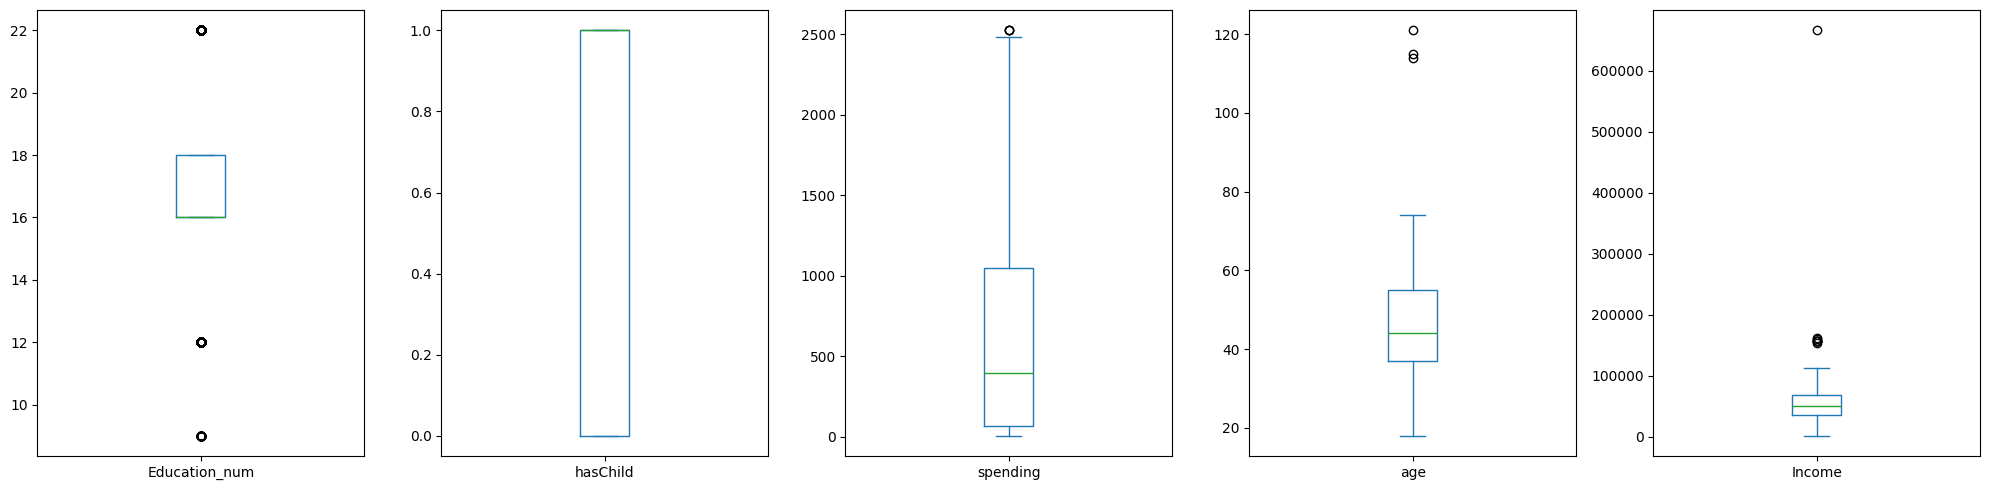

In [28]:
import matplotlib.pyplot as plt

cols_to_plot = ['Education_num', 'hasChild', 'spending', 'age', 'Income']
df_selected[cols_to_plot].plot(kind='box', subplots=True, layout=(1, 5), figsize=(20, 5), sharey=False)
plt.tight_layout()
plt.show()

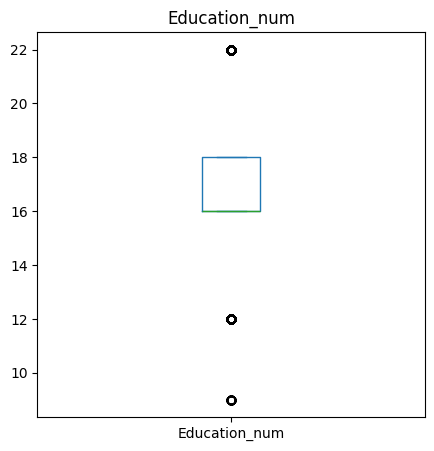

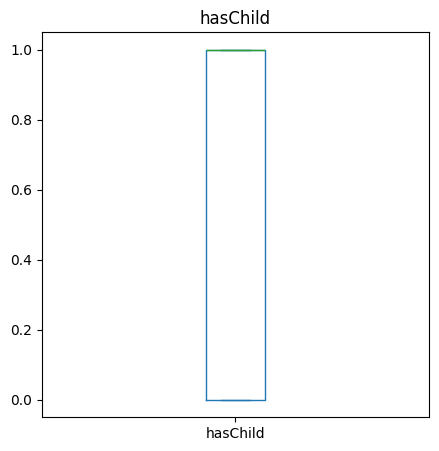

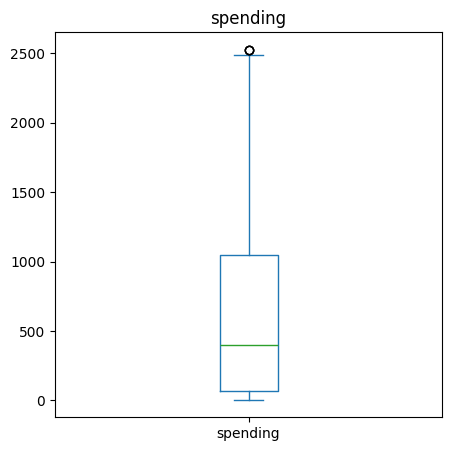

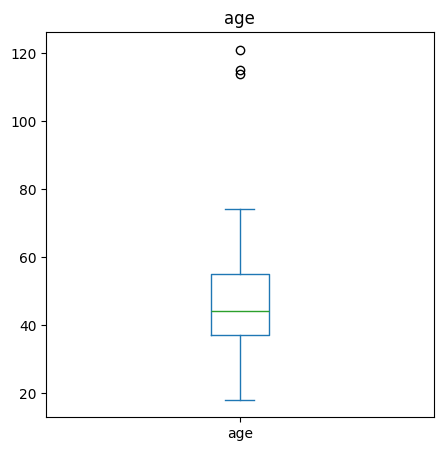

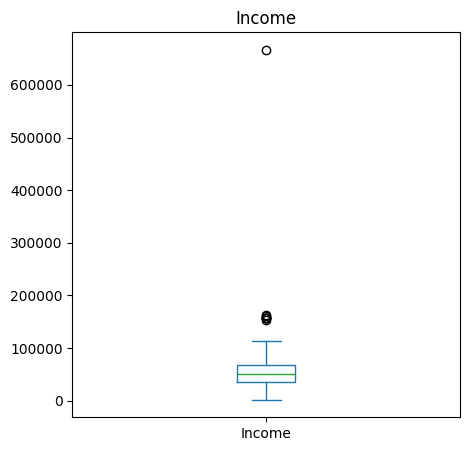

In [30]:
for col in cols_to_plot:
    df_selected[col].plot(kind='box', figsize=(5, 5))
    plt.title(col)
    plt.show()

In [31]:
from sklearn.impute import KNNImputer

# KNNImputer를 사용하여 'Education_num'과 'age'로 'Income' 결측치 예측
imputer = KNNImputer(n_neighbors=5)
# df_selected에는 이미 필요한 컬럼이 있음
impute_cols = ['Education_num', 'age', 'Income']
impute_data = df_selected[impute_cols]

# KNNImputer는 모든 값이 결측치가 아닌 행만으로 거리 계산, 'Income'만 결측치 허용
imputed = imputer.fit_transform(impute_data)

# 예측된 Income 값으로 대체
df_selected['Income'] = imputed[:, 2]

# df에도 반영
df.loc[df_selected.index, 'Income'] = df_selected['Income']

df_selected.head()

,Education_num,hasChild,spending,age,Marital_Status,Income
0,16,0,1617,57,single,58138.0
1,16,1,27,60,single,46344.0
2,16,0,776,49,together,71613.0
3,16,1,53,30,together,26646.0
4,22,1,422,33,together,58293.0


In [32]:
print(df.isnull().sum())

ID                     0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
age                    0
hasChild               0
Education_num          0
spending               0
dtype: int64


In [33]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,hasChild,Education_num,spending
0,5524,Graduation,single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,3,11,1,57,0,16,1617
1,2174,Graduation,single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,3,11,0,60,1,16,27
2,4141,Graduation,together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,3,11,0,49,0,16,776
3,6182,Graduation,together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,3,11,0,30,1,16,53
4,5324,PhD,together,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,3,11,0,33,1,22,422


In [34]:
df_selected.head()

,Education_num,hasChild,spending,age,Marital_Status,Income
0,16,0,1617,57,single,58138.0
1,16,1,27,60,single,46344.0
2,16,0,776,49,together,71613.0
3,16,1,53,30,together,26646.0
4,22,1,422,33,together,58293.0


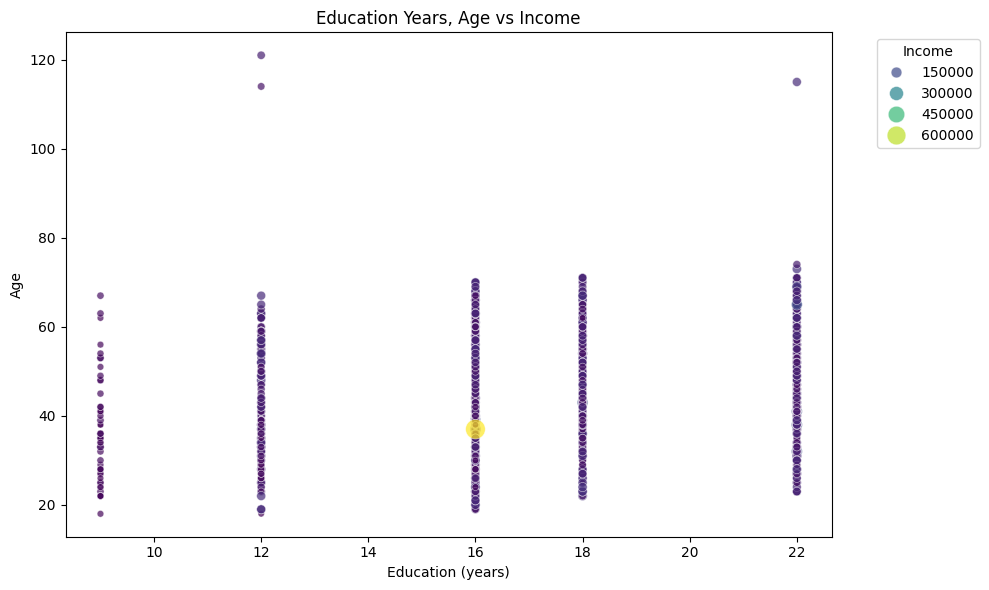

In [35]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Education_num', y='age', hue='Income', palette='viridis', size='Income', sizes=(20, 200), alpha=0.7)
plt.title('Education Years, Age vs Income')
plt.xlabel('Education (years)')
plt.ylabel('Age')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [36]:
df = df[df['age'] <= 100].reset_index(drop=True)
df_selected = df_selected[df_selected['age'] <= 100].reset_index(drop=True)
df_subset = df_subset[df_subset['age'] <= 100].reset_index(drop=True)

In [37]:
# 인컴(Income) 컬럼의 이상치(상위 1% 초과) 제거
income_threshold = df['Income'].quantile(0.99)
df = df[df['Income'] <= income_threshold].reset_index(drop=True)
df_selected = df_selected[df_selected['Income'] <= income_threshold].reset_index(drop=True)
df_subset = df_subset[df_subset.index.isin(df_selected.index)].reset_index(drop=True)

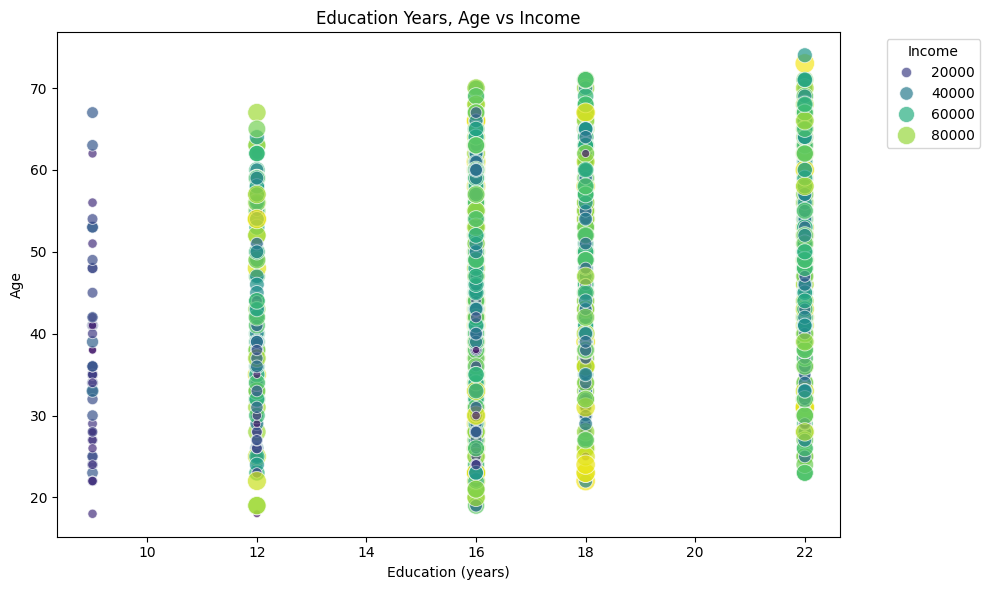

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Education_num', y='age', hue='Income', palette='viridis', size='Income', sizes=(20, 200), alpha=0.7)
plt.title('Education Years, Age vs Income')
plt.xlabel('Education (years)')
plt.ylabel('Age')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

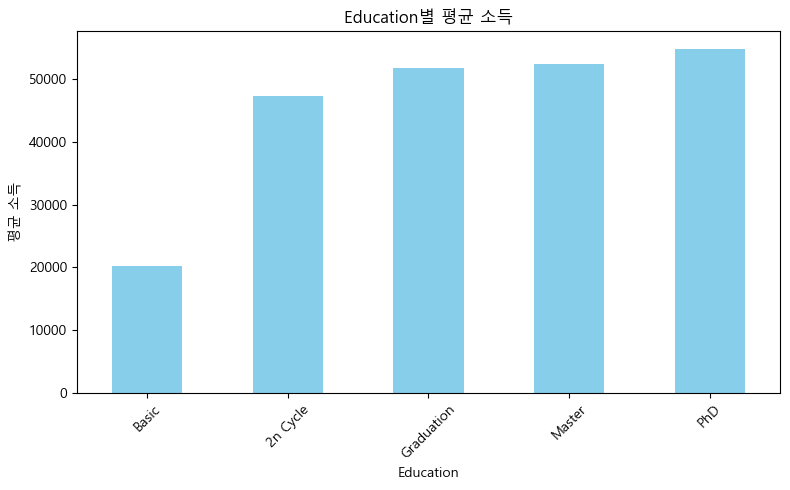

In [40]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')  # 윈도우의 경우 'Malgun Gothic' 사용
plt.rc('axes', unicode_minus=False)     # 마이너스(-) 깨짐 방지

# df_selected에 기존 df의 'Education' 열 추가
df_selected['Education'] = df.loc[df_selected.index, 'Education']

# education별 평균 소득 계산
mean_income_by_education = df_selected.groupby('Education')['Income'].mean().sort_values()

# 바그래프 시각화
plt.figure(figsize=(8, 5))
mean_income_by_education.plot(kind='bar', color='skyblue')
plt.ylabel('평균 소득')
plt.title('Education별 평균 소득')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

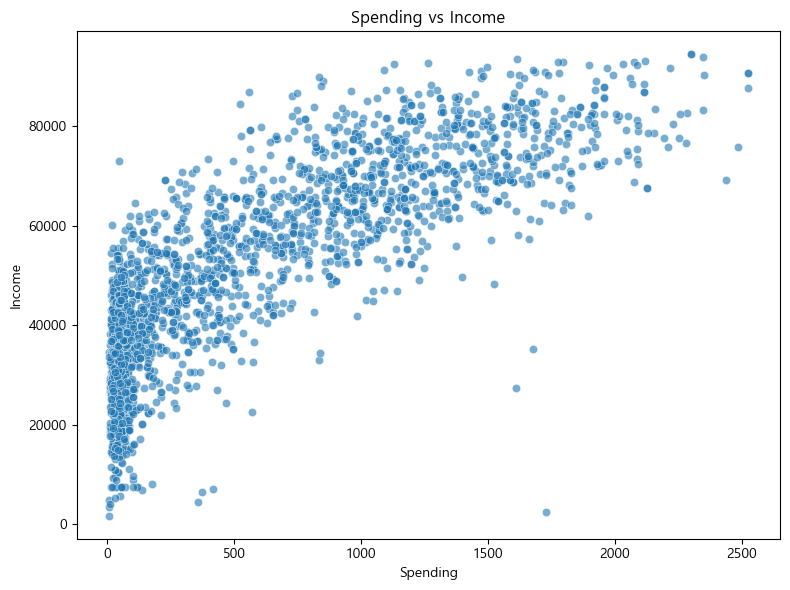

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_selected, x='spending', y='Income', alpha=0.6)
plt.title('Spending vs Income')
plt.xlabel('Spending')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

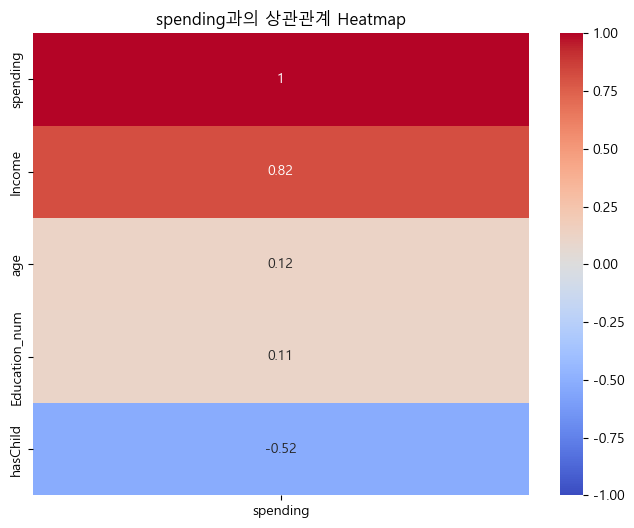

In [42]:
import seaborn as sns

import matplotlib.pyplot as plt

# spending과 수치형 변수들 간의 상관계수 계산
numeric_cols = df_selected.select_dtypes(include=['number']).columns
corr = df_selected[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr[['spending']].sort_values(by='spending', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('spending과의 상관관계 Heatmap')
plt.show()